In [1]:
from fastai.vision.all import * 
import timm

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
                                     get_image_files(path), valid_pct=0.2, seed=42, label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
                                    item_tfms=Resize(224))

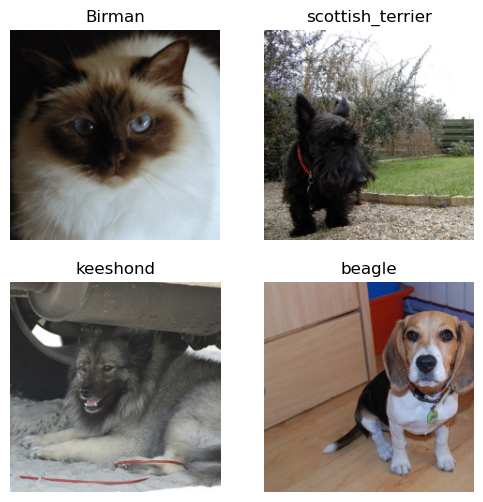

In [3]:
dls.show_batch(max_n=4)

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/nakamura.ryo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:06<00:00, 13.2MB/s]


In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/Users/nakamura.ryo/anaconda3/envs/fastbook/lib/python3.12/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

/Users/nakamura.ryo/anaconda3/envs/fastbook/lib/python3.12/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/nakamura.ryo/anaconda3/envs/fastbook/lib/python3.12/site-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
